# Data Science And Business Analytics Tasks - Sparks Foundation

# Prediction using Supervised ML

# Task 1 : What will be predicted score if a student studies for 9.25hrs/day?

# This is simple linear regression task as it involves just 2 variables

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Student based study hours.csv")

In [3]:
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#My target variable is continuous so I do regression

In [5]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
#Their are no outliers

In [7]:
df.shape

(25, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
#There are no missing value

In [10]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [11]:
#Here both variable are continuous

array([[<AxesSubplot:title={'center':'Hours'}>,
        <AxesSubplot:title={'center':'Scores'}>]], dtype=object)

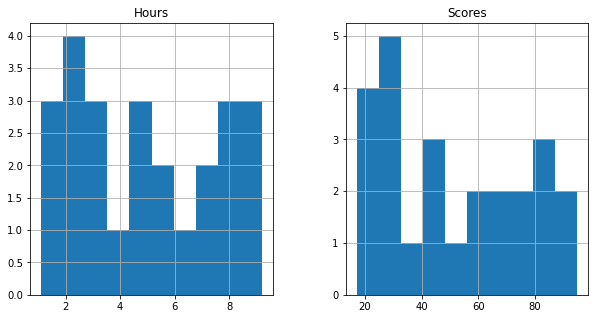

In [12]:
df.hist(["Hours","Scores"], figsize=(10,5))

In [13]:
#their are no outliers

In [14]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [15]:
df.head(2)

,Hours,Scores
0,2.5,21
1,5.1,47


In [16]:
##From the scatter plot we can see that it is a linear positive relationship

<AxesSubplot:title={'center':'Hours vs Scores'}, xlabel='Hours', ylabel='Scores'>

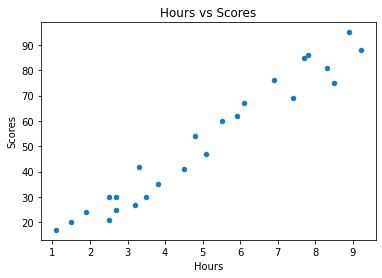

In [17]:
df.plot.scatter(x="Hours",y="Scores", title="Hours vs Scores")

In [18]:
##Scores is positively correlated with Hours

In [19]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [20]:
#Now we can calculate correlation marix.Then i am subsetting my data.

In [21]:
ContinuousCols=["Hours","Scores"]

In [22]:
CorrelationData=df[ContinuousCols].corr()
CorrelationData

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [23]:
SelectedColumns=["Hours","Scores"]

# Selecting final columns
DataForML=df[SelectedColumns]
DataForML.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [24]:
##Then we covert them into dummy variable.But dummy not affected in the variable

In [25]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric["Scores"]=df["Scores"]

# Printing sample rows
DataForML_Numeric.head(20)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [26]:
DataForML_Numeric.columns

Index(['Hours', 'Scores'], dtype='object')

In [27]:
TargetVariable="Scores"
Predictors=["Hours"]


X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values



# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [28]:
#Quick check on the shapes of train and test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(17, 1)
(17,)
(8, 1)
(8,)


In [29]:
np.set_printoptions(suppress=True)
X_train[0:23]

array([[5.9],
       [3.8],
       [8.5],
       [6.9],
       [9.2],
       [6.1],
       [7.7],
       [4.8],
       [7.8],
       [8.3],
       [2.7],
       [2.5],
       [1.9],
       [2.5],
       [8.9],
       [3.5],
       [2.7]])

In [30]:
y_train[0:23]

array([62, 35, 75, 76, 88, 67, 85, 54, 86, 81, 30, 30, 24, 21, 95, 30, 25],
      dtype=int64)

In [31]:

from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()


print(RegModel)


LREG=RegModel.fit(X_train,y_train)




from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
prediction=LREG.predict(X_test)
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)


# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Scores']-TestingDataResults['PredictedScores']))/TestingDataResults['Scores'])

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable, 'APE']].head())


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.9579593063012181

##### Model Validation and Accuracy Calculations ##########
   Scores  PredictedScores        APE
0      20             16.0  20.000000
1      47             53.0  12.765957
2      42             34.0  19.047619
3      27             33.0  22.222222
4      41             47.0  14.634146
Mean Accuracy on test data: 83.34667033747156
Median Accuracy on test data: 83.15911730545878

Accuracy values for 10-fold Cross Validation:
 [74.11742571 81.54809828 94.52753976 90.09659646 80.13826039 91.3693467
 89.07370108 93.45319247 89.08208359 90.30731385]

Final Average Accuracy of the model: 87.37


In [32]:
100*(abs(20-16)/20)

20.0

In [33]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [34]:
TestingDataResults['Scores']=TestingDataResults['Scores'].mean()
TestingDataResults.head()

,Hours,Scores,PredictedScores,APE
0,1.5,40.375,16.0,20.000000
1,5.1,40.375,53.0,12.765957
2,3.3,40.375,34.0,19.047619
3,3.2,40.375,33.0,22.222222
4,4.5,40.375,47.0,14.634146


In [35]:
LREG.coef_

array([10.06790391])

In [36]:
LREG.intercept_

1.213964938859398

In [37]:
Score=(10.06*9.25)+1.211

In [38]:
print ("The predicted score is:", Score)

The predicted score is: 94.266
